(29.99671173095703, 63.748023986816406)


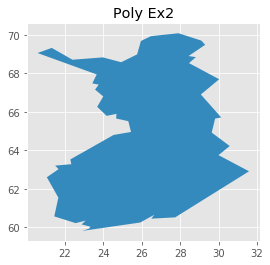

In [40]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

empty_var_to_be_replaced = None

# X -coordinates
xcoords = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Y -coordinates
ycoords = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]

# P1. Create a list of x and y coordinate pairs out of xcoords and ycoords
# ------------------------------------------------------------------------
# Coordinate pair can be either a tuple or a list.
# The first coordinate pair in the 'coordpairs' -list should look like: (29.99671173095703, 63.748023986816406)
# Hint: you might want to iterate over items in the lists using a loop

if not len(xcoords) == len(ycoords):
    print("Error, coordinate arrays don't have same length")

coordpairs = []
i=0
while i < len(xcoords):
    coordpairs.append((xcoords[i], ycoords[i]))
    i = i+1

print(coordpairs[0])

# -------------

zipped = zip(xcoords, ycoords)
coordpairs_2 = list(zipped)

# -------------

dfp = pd.DataFrame({'xcoords': xcoords, 'ycoords': ycoords})

def make_pair(row):
    return (row['xcoords'], row['ycoords'])

dfp['coord_pairs'] = dfp.apply(make_pair, axis=1)
coordpairs_3 = dfp['coord_pairs'].tolist()

# P2. Create a shapely Polygon using the 'coordpairs' -list
# ------------------------------------------------------------------------
poly = Polygon(coordpairs)

# P3. Create an empty GeoDataFrame
# ---------------------------------
geo = gpd.GeoDataFrame()

# P4. Insert our 'poly' -polygon into the 'geo' GeoDataFrame using a column name 'geometry'
# ------------------------------------------------------------------------------------------
# Hint: Take advantage of .loc -function
geo.loc[0, 'geometry'] = poly

# P5. Save the GeoDataFrame into a new Shapefile called 'polygon.shp'
# --------------------------------------------------------------------
# Note: you do not need to define the coordinate reference system at this time
out_fp = "polygon_out.shp"

# Save to disk
geo.to_file(out_fp)

# P6. Plot the polygon using taking advantage of the .plot() -function in GeoDataFrame. Save a PNG figure out of your plot and upload it to your GitHub repository.
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

%matplotlib inline

geo.plot()
plt.title("Poly Ex2");
plt.savefig("polygon_out.png")





In [41]:
import pandas as pd

df = pd.read_csv('Years.2015-2017.ibtracs_wmo.storms.north_atlantic.csv', sep=',', encoding='latin1')

df = df[df['Basin'].isin([' NA'])]

pd.set_option('max_columns',20)

display(df.sample(50))

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type
1160,2016263N13333,2016,13,NA,NA,LISA,2016-09-21 06:00:00,TS,17.2,-31.7,45.0,1002.0,atcf,50.436,45.642,main
1060,2016256N20312,2016,10,NA,NA,IAN,2016-09-16 00:00:00,TS,41.2,-46.8,45.0,998.0,atcf,50.436,57.789,main
845,2016158N22272,2016,3,NA,GM,COLIN,2016-06-05 12:00:00,TS,21.6,-88.0,30.0,1005.0,atcf,17.645,32.311,main
412,2015248N12337,2015,7,NA,NA,GRACE,2015-09-07 06:00:00,TS,13.5,-33.4,45.0,1002.0,atcf,50.436,45.642,main
850,2016158N22272,2016,3,NA,GM,COLIN,2016-06-06 18:00:00,TS,28.1,-86.1,45.0,1003.0,atcf,50.436,42.121,main
952,2016235N11341,2016,7,NA,NA,GASTON,2016-08-28 18:00:00,TS,30.5,-55.0,100.0,962.0,atcf,92.940,92.369,main
907,2016230N12328,2016,6,NA,NA,FIONA,2016-08-20 12:00:00,TS,20.0,-47.2,45.0,1004.0,atcf,50.436,38.284,main
1103,2016257N13341,2016,11,NA,NA,KARL,2016-09-22 06:00:00,TS,23.5,-60.3,30.0,1007.0,atcf,17.645,21.551,main
546,2015270N27291,2015,11,NA,NA,JOAQUIN,2015-10-06 18:00:00,TS,38.8,-58.0,70.0,974.0,atcf,78.944,86.745,main
906,2016230N12328,2016,6,NA,NA,FIONA,2016-08-20 06:00:00,TS,19.2,-46.1,40.0,1005.0,atcf,42.727,32.311,main


In [42]:
from shapely.geometry import Point, Polygon

df['geometry'] = None

def make_point_fast(row):
    return Point(row['Longitude'], row['Latitude'])

# for index, row in df.iterrows():
#    df.loc[index, 'geometry'] = Point(row['lon'], row['lat'])

df['geometry'] = df.apply(make_point_fast, axis=1)

display(df.head(5))

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type,geometry
256,2015126N27281,2015,1,NA,NA,ANA,2015-05-06 06:00:00,DS,26.8,-79.2,25.0,1016.0,atcf,5.031,0.283,main,POINT (-79.2 26.8)
257,2015126N27281,2015,1,NA,NA,ANA,2015-05-06 12:00:00,DS,28.2,-78.5,25.0,1015.0,atcf,5.031,0.463,main,POINT (-78.5 28.2)
258,2015126N27281,2015,1,NA,NA,ANA,2015-05-06 18:00:00,DS,29.7,-77.8,25.0,1014.0,atcf,5.031,0.775,main,POINT (-77.8 29.7)
259,2015126N27281,2015,1,NA,NA,ANA,2015-05-07 00:00:00,DS,30.8,-77.5,30.0,1012.0,atcf,17.645,2.140,main,POINT (-77.5 30.8)
260,2015126N27281,2015,1,NA,NA,ANA,2015-05-07 06:00:00,DS,30.7,-77.8,35.0,1010.0,atcf,32.623,5.681,main,POINT (-77.8 30.7)


In [70]:
import geopandas as gpd
from fiona.crs import from_epsg

# Convert DataFrame into a GeoDataFrame (providing the "geomtry" column from the pandas dataframe explicitly for GeoPandas dataframe as the geometry per feature)
geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs=from_epsg(4326))
display(geo_df.head(5))

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type,geometry
256,2015126N27281,2015,1,NA,NA,ANA,2015-05-06 06:00:00,DS,26.8,-79.2,25.0,1016.0,atcf,5.031,0.283,main,POINT (-79.20000 26.80000)
257,2015126N27281,2015,1,NA,NA,ANA,2015-05-06 12:00:00,DS,28.2,-78.5,25.0,1015.0,atcf,5.031,0.463,main,POINT (-78.50000 28.20000)
258,2015126N27281,2015,1,NA,NA,ANA,2015-05-06 18:00:00,DS,29.7,-77.8,25.0,1014.0,atcf,5.031,0.775,main,POINT (-77.80000 29.70000)
259,2015126N27281,2015,1,NA,NA,ANA,2015-05-07 00:00:00,DS,30.8,-77.5,30.0,1012.0,atcf,17.645,2.140,main,POINT (-77.50000 30.80000)
260,2015126N27281,2015,1,NA,NA,ANA,2015-05-07 06:00:00,DS,30.7,-77.8,35.0,1010.0,atcf,32.623,5.681,main,POINT (-77.80000 30.70000)


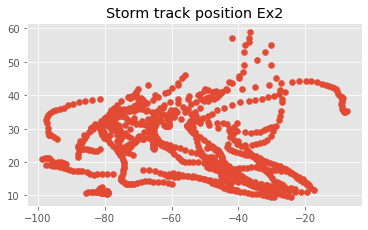

In [71]:
import matplotlib.pyplot as plt

%matplotlib inline

geo_df.plot()
plt.title("Storm track position Ex2");
plt.savefig("storm_track_positions.png")


out_fp = "storm_track_positions.shp"

# Save to disk
geo_df.to_file(out_fp)

# Plot the points using taking advantage of the .plot() -function in GeoDataFrame. Save a PNG figure of your plot
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [73]:
from shapely.geometry import LineString, Point

def createLineGeom(points_list):
    # Function should first check that the input list really contains Shapely Point(s)
    checked_points = []
    for p in points_list:
        if isinstance(p, Point):
            checked_points.append(p)
        else:
            pass
            # print("point {} is not a Point object".format(str(p)))
            # there are more sophisticated ways to check that, and make the program safer to bad input -> later
    # takes a list of Shapely Point objects as parameter and returns a LineString object of those input points
    if len(checked_points) >= 2:
        new_line = LineString(checked_points)
        return new_line
    else:
        # print("not enough points in input list t ocreate line")
        return None


grouped = geo_df.groupby('Serial_Num')

# Create an empty GeoDataFrame called movements
movements = gpd.GeoDataFrame()
movements['Serial_Num'] = None
movements['Name'] = None
movements['geometry'] = None

# Set the CRS of the movements GeoDataFrame to EPSG:4326 WGS84
from fiona.crs import from_epsg

movements.crs = from_epsg(4326)

display(movements)

new_rows = []

# for each storm ...
for key, values in grouped:
    
    # print(key)
    first = values.iloc[0]
    name = first['Name']
    
    # sort the rows by timestamp
    individual_storm = values.sort_values(by=['ISO_time'])
    
    # display(individual_storm)
    
    # create LineString objects based on the points
    point_list = []
    for index, row in individual_storm.iterrows():
        tmp_point = row['geometry']
        point_list.append(tmp_point)
    
    storm_line = createLineGeom(point_list)
    
    # add the geometry and the userid into the GeoDataFrame you created in the last step
    if not storm_line is None:
        # print(storm_line)
        # newdata.loc[index_counter, 'geometry'] = user_line
        # newdata.loc[index_counter, 'Serial_Num'] = key
        new_rows.append([key, name, storm_line])
    
    # break

# version 1
# for idx in range(0, len(new_rows)):
#     movements = movements.append({'userid': new_rows[idx][0], 'geometry': new_rows[idx][1]}, ignore_index=True)

# version 2
temp_df = pd.DataFrame(new_rows, columns=['Serial_Num', 'Name', 'geometry'])
display(temp_df.head(5))

newdata = movements.append(temp_df, sort=False)
display(newdata.head(5))

,Serial_Num,Name,geometry


,Serial_Num,Name,geometry
0,2015126N27281,ANA,"LINESTRING (-79.2 26.8, -78.5 28.2, -77.8 29.7..."
1,2015167N27266,BILL,"LINESTRING (-94.3 27, -95.2 27.6, -96 28, -96...."
2,2015193N35285,CLAUDETTE,"LINESTRING (-75.40000000000001 35.4, -74.59999..."
3,2015229N10331,DANNY,"LINESTRING (-29.3 9.6, -30.4 9.6, -31.5 9.6999..."
4,2015237N14315,ERIKA,"LINESTRING (-45.1 14.3, -46.9 14.4, -48.6 14.7..."


,Serial_Num,Name,geometry
0,2015126N27281,ANA,"LINESTRING (-79.20000 26.80000, -78.50000 28.2..."
1,2015167N27266,BILL,"LINESTRING (-94.30000 27.00000, -95.20000 27.6..."
2,2015193N35285,CLAUDETTE,"LINESTRING (-75.40000 35.40000, -74.60000 35.3..."
3,2015229N10331,DANNY,"LINESTRING (-29.30000 9.60000, -30.40000 9.600..."
4,2015237N14315,ERIKA,"LINESTRING (-45.10000 14.30000, -46.90000 14.4..."


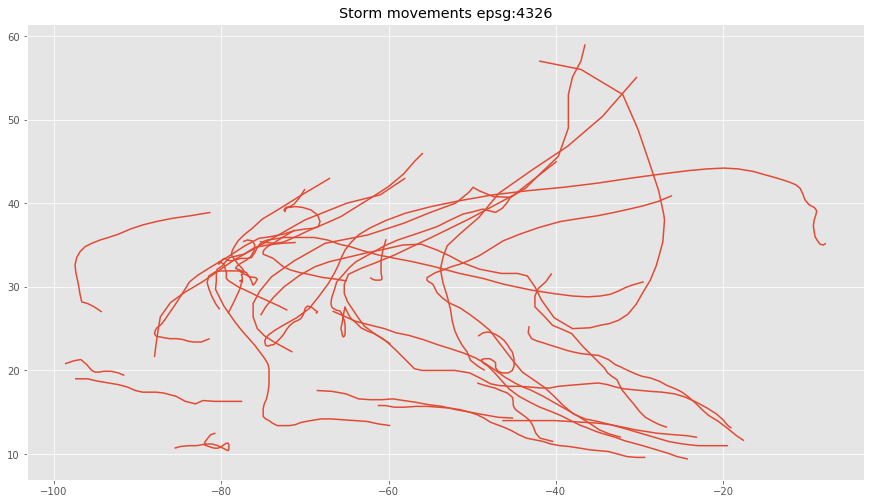

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.family'] = 'sans-serif'

newdata.plot()
plt.title("Storm movements epsg:4326");
plt.savefig("storm_movements.png")

# Save the movements of into a Shapefile called storm_movements.shp
out_file = "storm_movements.shp"
newdata.to_file(out_file)

In [77]:
# Reproject the data from WGS84 into EPSG:3857 web mercator / 3786 / 4088 / aedn

newdata_proj = newdata.to_crs(epsg=3857)


In [78]:
# Calculate the lenghts of the lines into a new column called distance in movements GeoDataFrame.
def calc_all_lengths(row):
    line = row['geometry']
    return line.length / 1000

newdata_proj['lengths'] = newdata_proj.apply(calc_all_lengths, axis=1)

display(newdata_proj.head(5))

,Serial_Num,Name,geometry,lengths
0,2015126N27281,ANA,"LINESTRING (-8816503.671 3098506.536, -8738580...",2994.027877
1,2015167N27266,BILL,"LINESTRING (-10497427.982 3123471.749, -105976...",2991.810266
2,2015193N35285,CLAUDETTE,"LINESTRING (-8393489.606 4218373.287, -8304434...",2788.399715
3,2015229N10331,DANNY,"LINESTRING (-3261661.080 1073702.705, -3384112...",3681.143088
4,2015237N14315,ERIKA,"LINESTRING (-5020509.035 1608657.407, -5220884...",2658.344720


In [80]:
# Questions
# Write your answers below the solved problems in your code file. You should also print the answers to the questions in your code.

# What was the shortest distance travelled in meters?
print(newdata_proj['lengths'].min())

# What was the mean distance travelled in meters?
print(newdata_proj['lengths'].mean())

# What was the maximum distance travelled in meters?
print(newdata_proj['lengths'].max())


818.3282528752318
4502.7072994026885
11307.634266031864


In [118]:
world = gpd.read_file('world_lowres.shp')

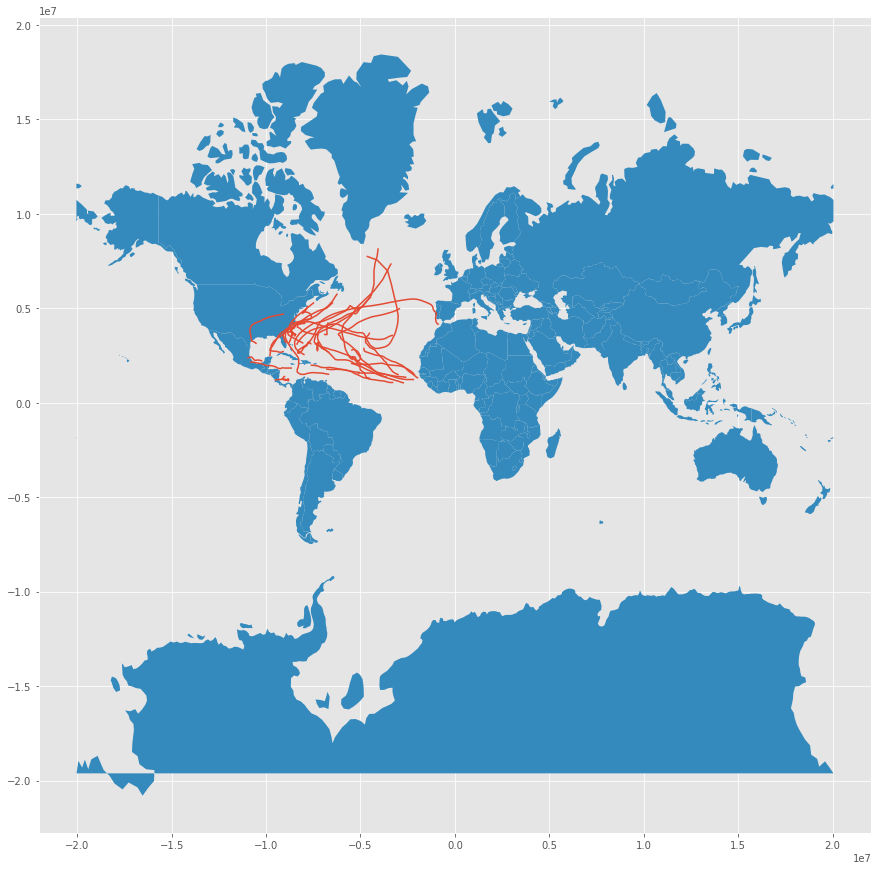

In [119]:
world_proj = world.to_crs(epsg=3857)
ax = world_proj.plot()
newdata_proj.plot(ax=ax)

In [121]:
centre_lat = 30
centre_lon = -50

proj4_txt_uncentered = '+proj=aeqd +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'
proj4_txt = '+proj=aeqd +lat_0={} +lon_0={} +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'.format(centre_lat, centre_lon)

In [122]:
# aedn proj centered uncentered / 4087

# newdata_d = newdata.to_crs(proj4_txt_uncentered)
newdata_d = newdata.to_crs(proj4_txt)
# newdata_d = newdata.to_crs(epsg=4087)

In [123]:
newdata_d['lengths_d'] = newdata_d.apply(calc_all_lengths, axis=1)

In [124]:
# What was the shortest distance travelled in meters?
print(newdata_d['lengths_d'].min())

# What was the mean distance travelled in meters?
print(newdata_d['lengths_d'].mean())

# What was the maximum distance travelled in meters?
print(newdata_d['lengths_d'].max())

688.1886851780318
3883.865582737653
8968.815367760806
